# Contents

1. [Comparing Source Images in Different Wavelength Regimes](#section-1)
- 1.1 [Compilations](#section-1.1)
2. [RAs, Decs, Altitudes and Azimuths - general info](#section-2)

<a id='section-1'></a>

# 1. Comparing Galaxy images in Different Wavelength Regimes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization import make_lupton_rgb

from astropy.io import ascii

In [2]:
# defining fits imaging functions


# for ir and radio fits files
def plot_normal_and_sigma_clipped(fits_obj):
    fits_data = fits_obj[0].data
    fits_data_squeezed = np.squeeze(fits_data)
    
    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(6)
    fig.set_figwidth(16)

    im0 = axes[0].imshow(fits_data_squeezed, cmap="gray")
    fig.colorbar(im0, ax=axes[0])

    mean0, median0, std0 = sigma_clipped_stats(fits_data_squeezed)
    im1 = axes[1].imshow(fits_data_squeezed, vmin = median0 - 5*std0, vmax = median0 + 5*std0, cmap='gray')
    fig.colorbar(im1, ax=axes[1])
    
    plt.show()

# for i, r, and g band fits files
def plot_visible(i_fits, r_fits, g_fits):
    
    i_data = i_fits[0].data
    r_data = r_fits[0].data
    g_data = g_fits[0].data
    
    irg_image = make_lupton_rgb(i_data, r_data, g_data,stretch=1.5,Q=10)

    plt.figure(figsize=(6,6))
    plt.imshow(irg_image, origin='lower')
    plt.show()
    
    
def plot_radio_ir_visible(radio_fits, ir_fits, i_fits, r_fits, g_fits, img_title):
    fig, axes = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(16)
    
    
    fig.suptitle(img_title, fontsize=20)
    
    # radio image

    radio_fits_data = radio_fits[0].data
    radio_fits_data_squeezed = np.squeeze(radio_fits_data)
    
    im0 = axes[0].imshow(radio_fits_data_squeezed, cmap="gray")
    plt.colorbar(im0, ax=axes[0])
    axes[0].set_title('Radio')

    # ir image
    
    ir_data = ir_fits[0].data
    
    im1 = axes[1].imshow(ir_data, cmap="gray")
    plt.colorbar(im0, ax=axes[1])
    axes[1].title.set_text('IR')

    
    # visible image
    
    i_data = i_fits[0].data
    r_data = r_fits[0].data
    g_data = g_fits[0].data
    
    irg_image = make_lupton_rgb(i_data, r_data, g_data,stretch=1.5,Q=10)
    
    im3 = axes[2].imshow(irg_image, origin='lower')
    axes[2].set_title('Visible')
    
    plt.savefig(img_title + '_all')

## M87 - Radio

The plotting function above is broken down and demonstrated only for the first dataset.

In [3]:
m87_radio = fits.open("M87_VLASS_22.fits")
m87_radio.info()

Filename: M87_VLASS_22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (121, 121, 1, 1)   float32   


In [4]:
m87_radio_data = m87_radio[0].data
print(m87_radio_data.shape, m87_radio_data.dtype, sep="\n")
m87_radio_data_squeezed = np.squeeze(m87_radio_data)
print(m87_radio_data_squeezed.shape)

(1, 1, 121, 121)
>f4
(121, 121)


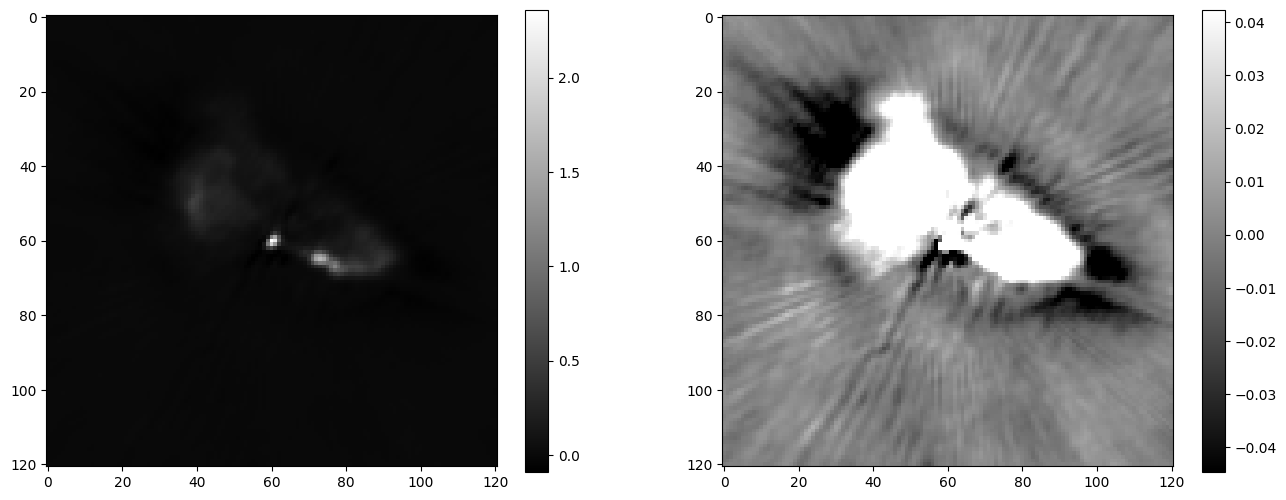

In [5]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(16)

im0 = axes[0].imshow(m87_radio_data_squeezed, cmap="gray")
fig.colorbar(im0, ax=axes[0])

mean0, median0, std0 = sigma_clipped_stats(m87_radio_data_squeezed)
im1 = axes[1].imshow(m87_radio_data_squeezed, vmin = median0 - 5*std0, vmax = median0 + 5*std0, cmap='gray')
fig.colorbar(im1, ax=axes[1])

plt.show()

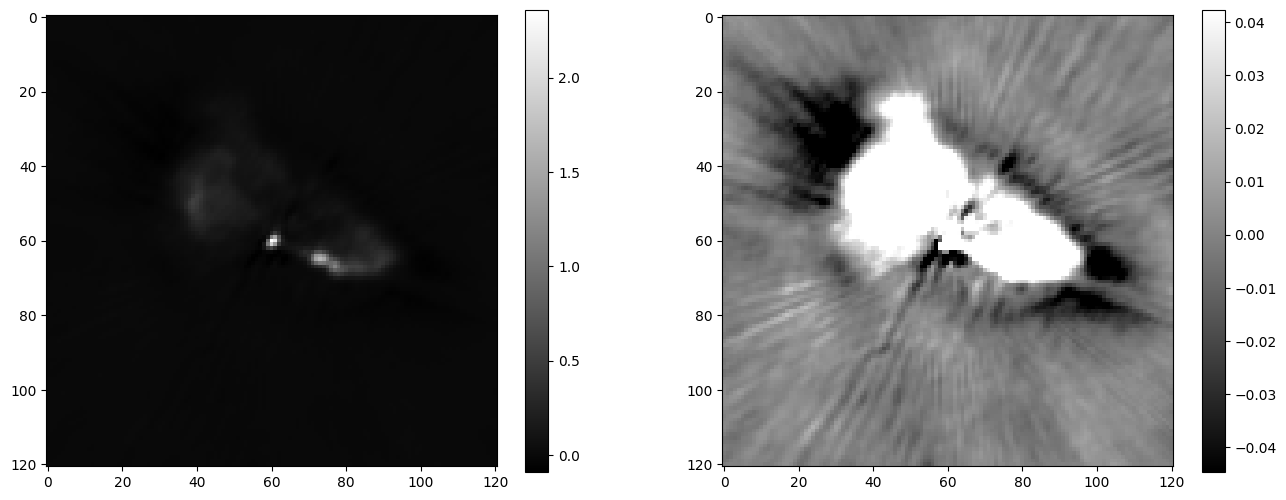

In [6]:
# plotting the same again with our function

plot_normal_and_sigma_clipped(m87_radio)

## M87 - IR

In [7]:
m87_ir = fits.open("M87_WISE_12micrometer.fits")
m87_ir.info()

m87_ir_data = m87_ir[0].data
print('\n\nShape data: \n', m87_ir_data.shape, m87_ir_data.dtype)

Filename: M87_WISE_12micrometer.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      86   (87, 87)   float32   


Shape data: 
 (87, 87) >f4


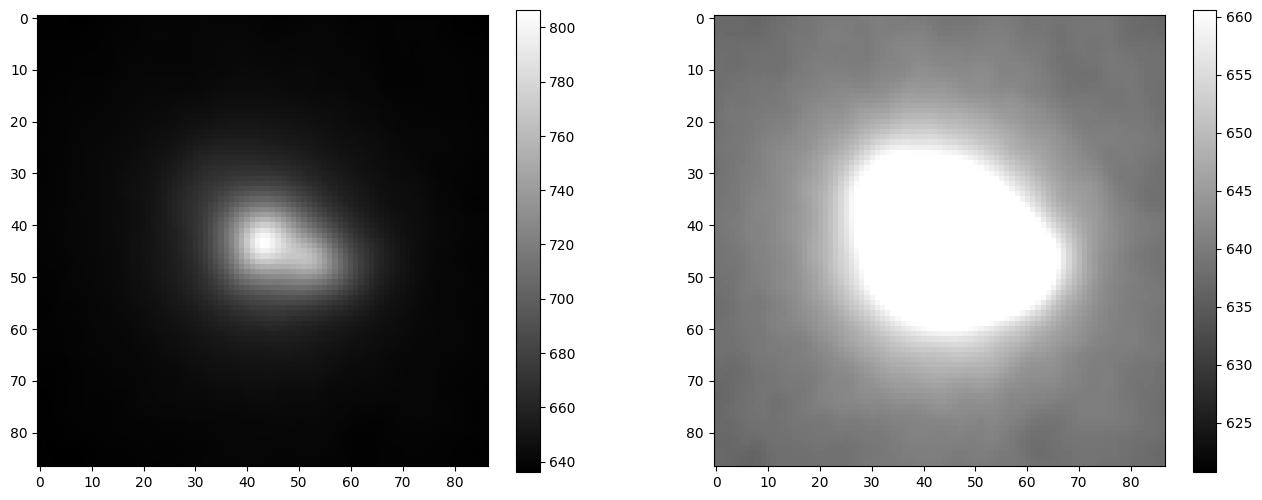

In [8]:
plot_normal_and_sigma_clipped(m87_ir)

## M87 - Visible

In [9]:
m87_g = fits.open('./M87_SDSS_g.fits')
m87_r = fits.open('./M87_SDSS_r.fits')
m87_i = fits.open('./M87_SDSS_i.fits')
m87_g.info(), m87_r.info(), m87_i.info()


print('\n\nShape data\n')
m87_g_data = m87_g[0].data
m87_i_data = m87_i[0].data
m87_r_data = m87_r[0].data
print(m87_g_data.shape, m87_g_data.dtype)
print(m87_i_data.shape, m87_i_data.dtype)
print(m87_r_data.shape, m87_r_data.dtype)

Filename: ./M87_SDSS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   
Filename: ./M87_SDSS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   
Filename: ./M87_SDSS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (458, 458)   float32   


Shape data

(458, 458) >f4
(458, 458) >f4
(458, 458) >f4


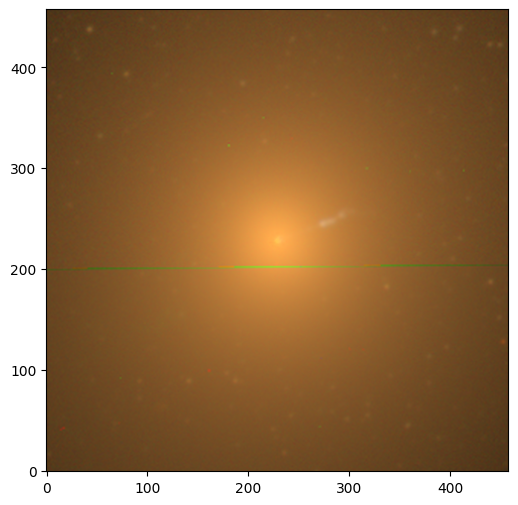

In [10]:
plot_visible(m87_i, m87_r, m87_g)

## 3C403 Radio

In [11]:
radio_3c403 = fits.open('3C403_VLASS_3_1.fits')
radio_3c403.info()

radio_3c403_data = radio_3c403[0].data
print(radio_3c403_data.shape)
radio_3c403_data = np.squeeze(radio_3c403_data)
print(radio_3c403_data.shape, radio_3c403_data.dtype)

Filename: 3C403_VLASS_3_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     851   (241, 241, 1, 1)   float32   
(1, 1, 241, 241)
(241, 241) >f4


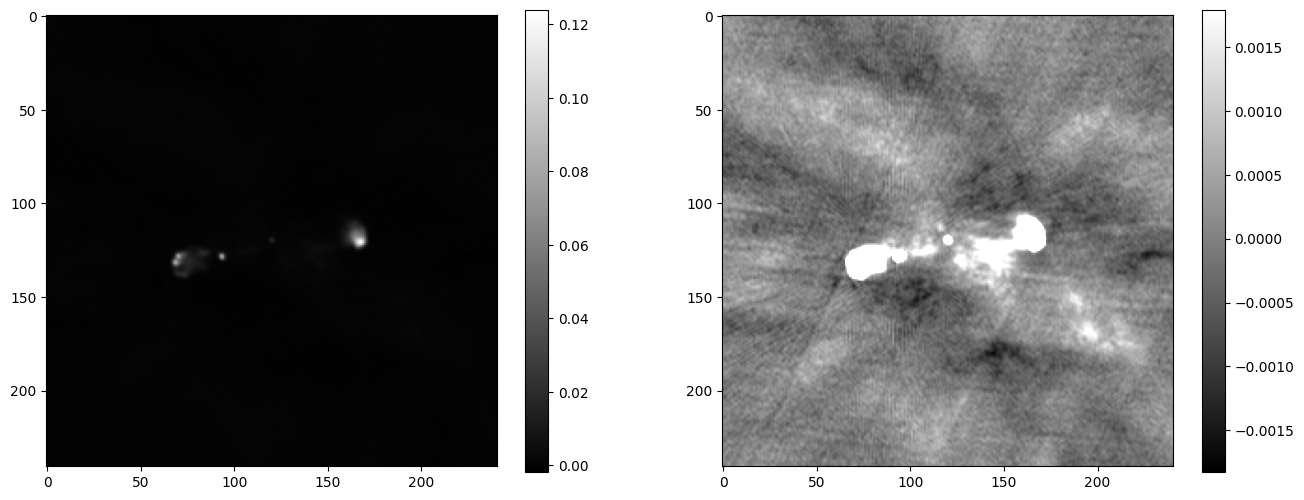

In [12]:
plot_normal_and_sigma_clipped(radio_3c403)

## 3C403 IR

In [13]:
ir_3c403 = fits.open("3C403_WISE_3.4mum_5.0_arcminute.fits")
ir_3c403.info()

ir_3c403_data = ir_3c403[0].data
print(ir_3c403_data.shape, ir_3c403_data.dtype)

Filename: 3C403_WISE_3.4mum_5.0_arcminute.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (436, 436)   float32   
(436, 436) >f4


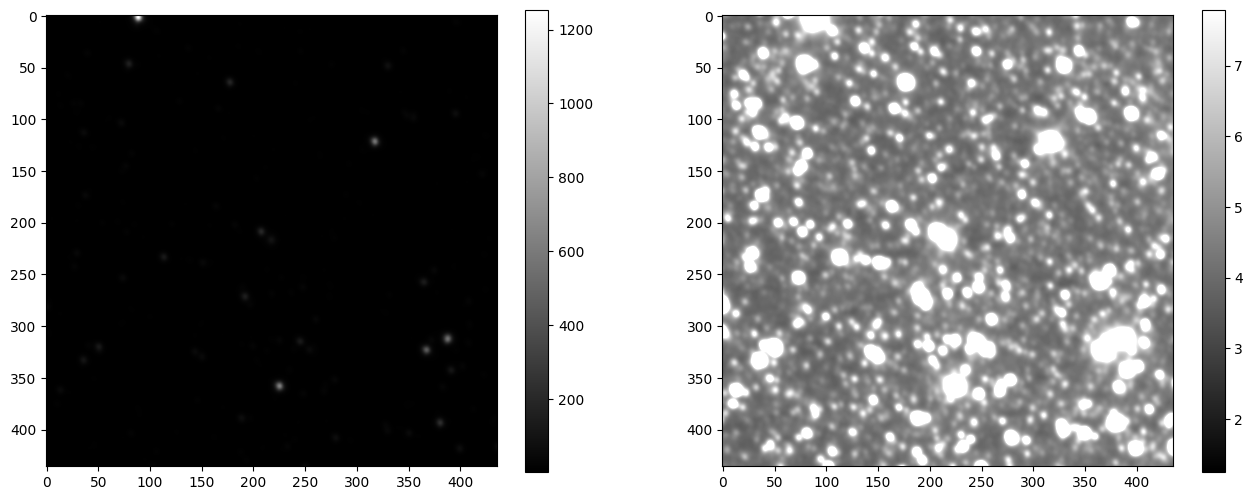

In [14]:
plot_normal_and_sigma_clipped(ir_3c403)

## 3C403 Visible

In [15]:
g_3c403 = fits.open('./3C403_PanSTARRS_g.fits')
r_3c403 = fits.open('./3C403_PanSTARRS_r.fits')
i_3c403 = fits.open('./3C403_PanSTARRS_i.fits')
g_3c403.info(), r_3c403.info(), i_3c403.info()

g_3c403_data = g_3c403[0].data
i_3c403_data = i_3c403[0].data
r_3c403_data = r_3c403[0].data
print(g_3c403_data.shape, g_3c403_data.dtype)
print(r_3c403_data.shape, r_3c403_data.dtype)
print(i_3c403_data.shape, i_3c403_data.dtype)

Filename: ./3C403_PanSTARRS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     284   (960, 959)   float32   
Filename: ./3C403_PanSTARRS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     274   (960, 959)   float32   
Filename: ./3C403_PanSTARRS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     274   (960, 959)   float32   
(959, 960) >f4
(959, 960) >f4
(959, 960) >f4


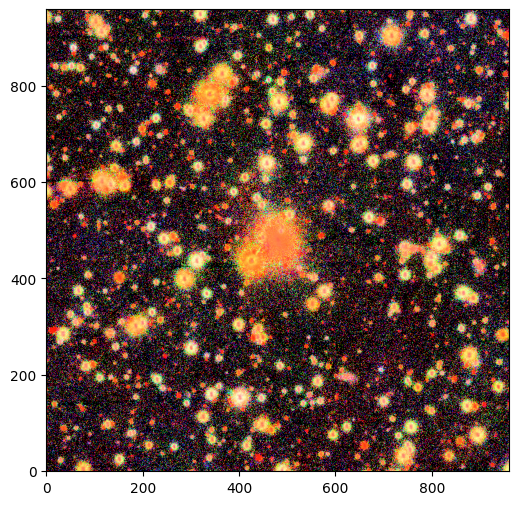

In [16]:
plot_visible(i_3c403, r_3c403, g_3c403)

## UGC595 Radio

In [17]:
radio_ugc595 = fits.open('UGC595_VLASS_31.fits')
radio_ugc595.info()

radio_ugc595_data = radio_ugc595[0].data
print(radio_ugc595_data.shape)
radio_ugc595_data = np.squeeze(radio_ugc595_data)
print(radio_ugc595_data.shape, radio_ugc595_data.dtype)

Filename: UGC595_VLASS_31.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     857   (361, 361, 1, 1)   float32   
(1, 1, 361, 361)
(361, 361) >f4


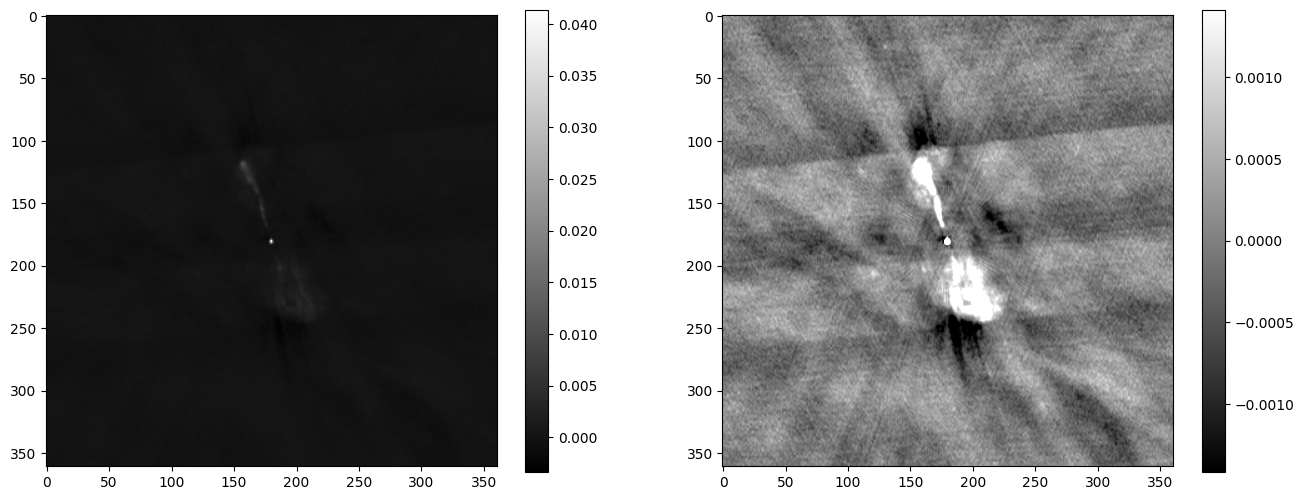

In [18]:
plot_normal_and_sigma_clipped(radio_ugc595)

## UGC595 IR

In [19]:
ir_ugc595 = fits.open("UGC595_WISE_3.4mum.fits")
ir_ugc595.info()

ir_ugc595_data = ir_ugc595[0].data
print(ir_ugc595_data.shape, ir_ugc595_data.dtype)

Filename: UGC595_WISE_3.4mum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (262, 262)   float32   
(262, 262) >f4


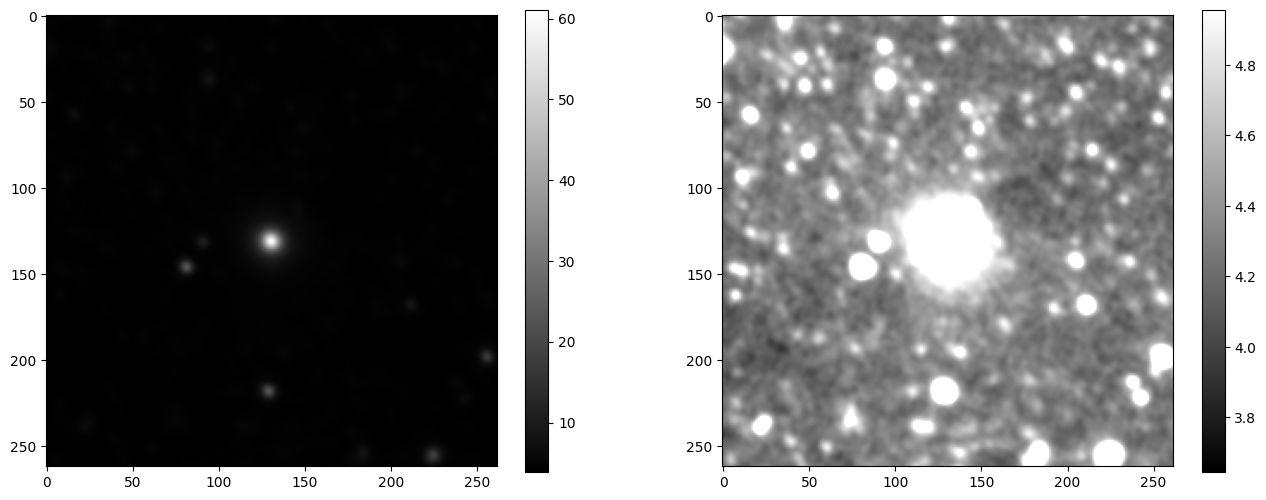

In [20]:
plot_normal_and_sigma_clipped(ir_ugc595)

## UGC595 Visible

In [21]:
g_ugc595 = fits.open('UGC595_SDSS_g.fits')
r_ugc595 = fits.open('UGC595_SDSS_r.fits')
i_ugc595 = fits.open('UGC595_SDSS_i.fits')
g_ugc595.info(), r_ugc595.info(), i_ugc595.info()

g_ugc595_data = g_ugc595[0].data
i_ugc595_data = i_ugc595[0].data
r_ugc595_data = r_ugc595[0].data
print(g_ugc595_data.shape, g_ugc595_data.dtype)
print(r_ugc595_data.shape, r_ugc595_data.dtype)
print(i_ugc595_data.shape, i_ugc595_data.dtype)

Filename: UGC595_SDSS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
Filename: UGC595_SDSS_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
Filename: UGC595_SDSS_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1374, 1374)   float32   
(1374, 1374) >f4
(1374, 1374) >f4
(1374, 1374) >f4


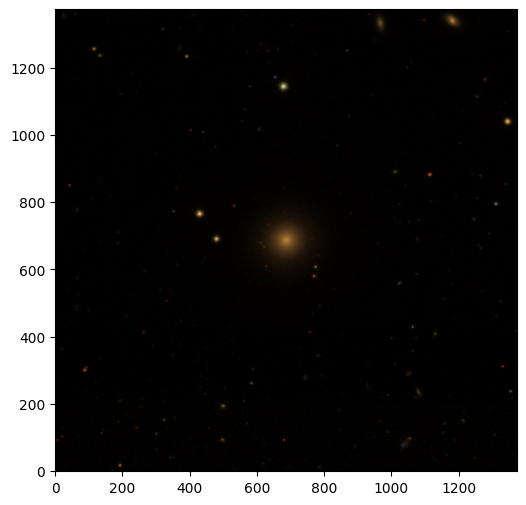

In [22]:
plot_visible(i_ugc595, r_ugc595, g_ugc595)

<a id='section-1.1'></a>

## Compilations

### M87

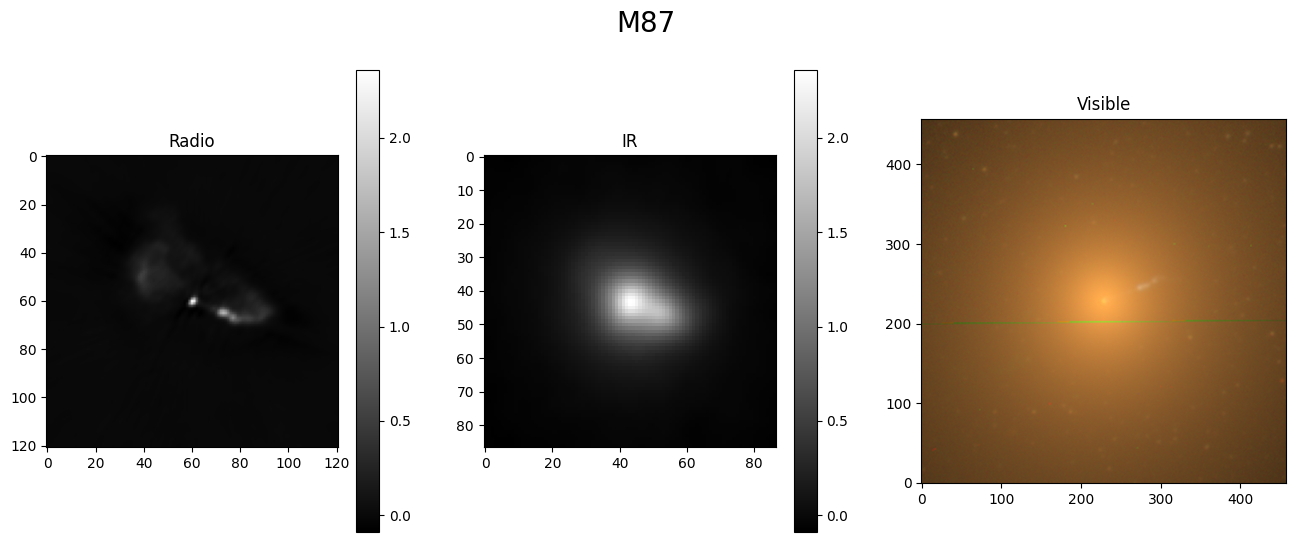

In [23]:
plot_radio_ir_visible(m87_radio, m87_ir, m87_i, m87_r, m87_g, 'M87')

Radio image of m87 highlights a jet of gases or other emmission from the core of the galaxy. While the IR and visible wavelength images have their brightest spots near the centers, the IR one is more diffused than the visible one indicating that there are some kind of objects in the galaxy which can act as a continnum of ir source, while thats not the case with visible image. 

### 3C403

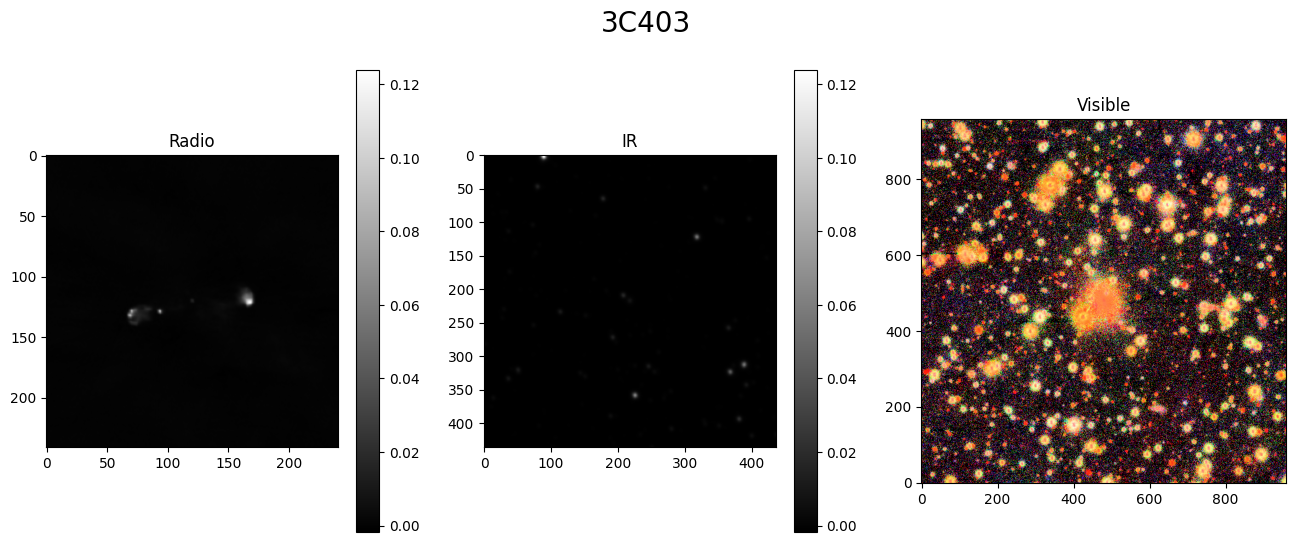

In [24]:
plot_radio_ir_visible(radio_3c403, ir_3c403, i_3c403, r_3c403, g_3c403, '3C403')

Radio image similar to above one reveals a cloud of gases like a remnant of supernova explosion (actually its a water megamaser) and this cloud of gases has no correlation to the stars we observe optically. The IR image reveals that few point sources among the bunch of stars seen from the visible image are capable of emitting strong IR radiation.

## UGC595

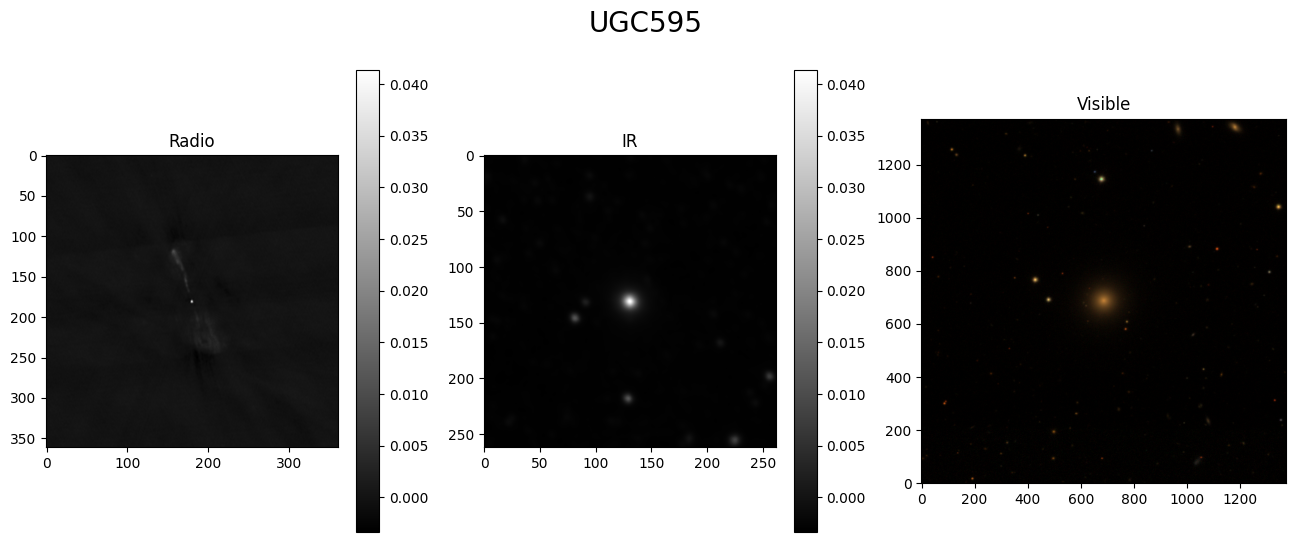

In [25]:
plot_radio_ir_visible(radio_ugc595, ir_ugc595, i_ugc595, r_ugc595, g_ugc595, 'UGC595')

An internet search revealed that this UGC00595 is a galactic nucleus, and we observe a faint radio jet being emitted along an axis of the center of nucleii, whose proportions might indicate its small age. Some stars are visible clearly in IR while some are clearly seen in visible images each complementing other. Nevertheless the central object is a strong emitter in all three wavelengths.

<a id='section-2'></a>

# 2 RAs, Decs, Altitudes and Azimuths - general info

$$\large Zenith Angle  = Dec\ of\ Star - Dec\ of \ observer = 90 - 19 = 71 \deg$$

$$\large Altitude = 90 - Zenith\ Angle = 90 - 71 = 19 degrees $$  
1. Altitiude of NCP = 19 deg, Azimuth = 0 deg (by defn)
2. Altitide of star on 0deg dec = 90 - (19 - 0) = 71 deg
3. Azimuth of point on C.Equator when its setting = 270 deg (West)
4. Altitude of GW = 90 - (-19 +23.3815) =  85.6185 deg
5. Can observe anything whose declinations lie between -71deg to +109 deg
6. RA and Dec of sun = 6h and 23.5 deg <br>
for GW RA 13h 09m 48.08s and Dec −23d 22m 53.3s (-23.5 deg approx)

They are 7h apart in HA, so they are far enough to observe during daytime. Since it is in the southern celestial hemisphere observing during summer can be hard.